# Table of Contents

1. [Introduction and Objectives](#1-introduction-and-objectives)  
   - [1.1 Objective](#11-objective)
2. [Loading Configuration and Dataset](#2-loading-configuration-and-dataset)
3. [Exploratory Data Analysis (EDA)](#3-exploratory-data-analysis-eda)  
   - [3.1 Overview of the Dataset](#31-overview-of-the-dataset)  
   - [3.2 Descriptive Statistics](#32-descriptive-statistics)  
   - [3.3 Missing Values Analysis](#33-missing-values-analysis)  
   - [3.4 Distribution of Categorical Variables](#34-distribution-of-categorical-variables)  
   - [3.5 Distribution of Numerical Variables](#35-distribution-of-numerical-variables)  
   - [3.6 Correlation Analysis](#36-correlation-analysis)  
   - [3.7 Conclusion of Exploratory Data Analysis](#37-conclusion-of-exploratory-data-analysis)
4. [Preprocessing and Feature Engineering](#4-preprocessing-and-feature-engineering)  
   - [4.1 Data Cleaning](#41-data-cleaning)  
   - [4.2 Categorical Data Encoding](#42-categorical-data-encoding)  
   - [4.3 Feature Scaling](#43-feature-scaling)  
5. [Training and Evaluating Models](#5-training-and-evaluating-models)  
   - [5.1 Data Preparation](#51-data-preparation)  
   - [5.2 Model Training and Evaluation](#52-model-training-and-evaluation)  
   - [5.3 Model Comparison](#53-model-comparison)  



# 1. Introduction and Objectives

Customer churn, the phenomenon of customers discontinuing a service, is a critical challenge for businesses across various industries. Understanding and predicting which customers are likely to churn allows companies to take proactive measures to retain them, thereby improving customer lifetime value and reducing marketing costs.

This notebook presents an end-to-end analysis and machine learning model for predicting customer churn using **PySpark**, a powerful tool for large-scale distributed data processing. By leveraging PySpark, this solution can efficiently handle and analyze large datasets in a scalable manner.

## 1.1 Objective

The primary objective of this notebook is to build an accurate machine learning model that can predict customer churn. The model will help businesses identify at-risk customers and allow them to intervene before churn occurs. We will follow these key steps in the process:

1. **Data Cleaning**: Handling missing values, outliers, and data inconsistencies to ensure a clean dataset for analysis.
2. **Exploratory Data Analysis (EDA)**: Performing an in-depth analysis of the dataset to understand feature distributions, relationships, and potential factors influencing churn.
3. **Feature Engineering**: Creating new features that can enhance the model’s predictive power, including handling categorical variables, date transformations, and scaling numerical features.
4. **Model Building and Tuning**: Training and evaluating multiple machine learning models, fine-tuning them using hyperparameter optimization, and selecting the best-performing model for churn prediction.

The final model will be evaluated based on several metrics, including accuracy, precision, recall, F1 score, and AUC, ensuring a well-rounded assessment of the model's performance.

# 2. Loading Configuration and Dataset

In this section, we will configure the Spark session and load the dataset that we will use throughout this notebook for the customer churn prediction task.

We will:
- Set up the necessary Spark configurations.
- Define paths to important resources (like datasets).
- Load the dataset into a Spark DataFrame.

In [3]:
# Import necessary libraries for Spark
from pyspark.sql import SparkSession

# 1. Configure Spark Session
spark = SparkSession.builder \
    .appName("ChurnPrediction") \
    .config("spark.driver.memory", "6g") \
    .getOrCreate()

# Set log level to ERROR to minimize unnecessary output
spark.sparkContext.setLogLevel("ERROR")

# 2. Define the path to the dataset
file_path = "./churn.csv"

# 3. Load the dataset into a Spark DataFrame
df = spark.read.format("csv") \
    .option("header", "true") \
    .option("inferSchema", "true") \
    .load(file_path)



# 3. Exploratory Data Analysis (EDA)

In this section, we will explore the dataset to better understand the distribution of key features, relationships between variables, and potential insights that can be useful for building our churn prediction model.

We will:
- Generate descriptive statistics.
- Visualize the distribution of key features.
- Investigate correlations between variables.

## 3.1 Overview of the Dataset

In this section, we will inspect the basic structure of the dataset, including the number of rows, columns, and their respective data types.

In [4]:
# Show the schema of the dataset to understand its structure
df.printSchema()

# Show a few rows to get a feel for the data
df.show(5)

root
 |-- age: integer (nullable = true)
 |-- gender: string (nullable = true)
 |-- security_no: string (nullable = true)
 |-- region_category: string (nullable = true)
 |-- membership_category: string (nullable = true)
 |-- joining_date: string (nullable = true)
 |-- joined_through_referral: string (nullable = true)
 |-- referral_id: string (nullable = true)
 |-- preferred_offer_types: string (nullable = true)
 |-- medium_of_operation: string (nullable = true)
 |-- internet_option: string (nullable = true)
 |-- last_visit_time: timestamp (nullable = true)
 |-- days_since_last_login: integer (nullable = true)
 |-- avg_time_spent: double (nullable = true)
 |-- avg_transaction_value: double (nullable = true)
 |-- avg_frequency_login_days: string (nullable = true)
 |-- points_in_wallet: double (nullable = true)
 |-- used_special_discount: string (nullable = true)
 |-- offer_application_preference: string (nullable = true)
 |-- past_complaint: string (nullable = true)
 |-- complaint_status

### 3.1 Overview of the Dataset - Results Summary

The dataset contains 23 columns with various types of data about customers and their behavior. Key columns include:

•	age (integer): Represents the age of the customer.

•	gender (string): Customer’s gender, with values like “M” and “F”, but some may be missing or unknown.

•	security_no (string): An identifier for the customer, potentially anonymized.

•	region_category (string): Represents the type of region the customer is from (e.g., Village, Town, City).

•	membership_category (string): Indicates the customer’s membership level, ranging from no membership to premium or platinum memberships.

•	joining_date (string): The date the customer joined the service.

•	joined_through_referral (string): Whether the customer joined via a referral program (Yes/No).

•	preferred_offer_types (string): Indicates the types of offers the customer prefers, such as gift vouchers or credit/debit card offers.

•	medium_of_operation (string): The platform used by the customer (e.g., desktop, smartphone).

•	internet_option (string): Describes the type of internet connection (e.g., Wi-Fi, mobile data).

•	last_visit_time (timestamp): The most recent time the customer visited the platform.

•	days_since_last_login (integer): Number of days since the customer last logged in.

•	avg_time_spent (double): Average time spent by the customer per visit, in minutes.

•	avg_transaction_value (double): The average value of customer transactions.

•	avg_frequency_login_days (string): The average number of days between logins, with some potential errors.

•	points_in_wallet (double): Points accumulated by the customer in their wallet.

•	used_special_discount (string): Whether the customer used special discounts (Yes/No).

•	offer_application_preference (string): Whether the customer prefers applying offers (Yes/No).

•	past_complaint (string): Indicates if the customer has previously filed complaints.

•	complaint_status (string): Status of any customer complaints (e.g., Solved, Unsolved).

•	feedback (string): Customer feedback, possibly related to complaints or overall satisfaction.

•	churn_risk_score (integer): The target variable, indicating the likelihood of the customer churning (0 = low risk, 1 = high risk).

This initial exploration shows that the dataset contains a mix of categorical and numerical variables, as well as some missing values and potential data quality issues (missing values in points_in_wallet). These issues will need to be addressed in the data cleaning process.

## 3.2 Descriptive Statistics

Here, we summarize the central tendencies and spread of the numerical variables in the dataset.

In [5]:
# Display summary statistics for numerical columns
df.describe().show()

+-------+------------------+-------+-----------+---------------+-------------------+------------+-----------------------+-----------+---------------------+-------------------+---------------+---------------------+-----------------+---------------------+------------------------+------------------+---------------------+----------------------------+--------------+--------------------+--------------------+------------------+
|summary|               age| gender|security_no|region_category|membership_category|joining_date|joined_through_referral|referral_id|preferred_offer_types|medium_of_operation|internet_option|days_since_last_login|   avg_time_spent|avg_transaction_value|avg_frequency_login_days|  points_in_wallet|used_special_discount|offer_application_preference|past_complaint|    complaint_status|            feedback|  churn_risk_score|
+-------+------------------+-------+-----------+---------------+-------------------+------------+-----------------------+-----------+-----------------

### 3.2 Descriptive Statistics - Results Summary


	•	Days Since Last Login: Contains problematic values, with a minimum of -999. Needs cleaning.
	•	Average Time Spent: Ranges from highly negative to positive values, suggesting data errors.
	•	Average Frequency of Login Days: Includes invalid values like “Error” and negatives, requiring cleaning.
	•	Points in Wallet: Contains negative values, which don’t make sense and need correction.
	•	Churn Risk Score: Balanced between 0 and 1, indicating a good distribution for analysis.

Issues to Address:

	1.	Negative Values: Found in key columns like days_since_last_login, avg_time_spent, and points_in_wallet.
	2.	String Errors: Present in avg_frequency_login_days requiring correction.
	3.	Potential Outliers: Large variance in avg_time_spent and avg_transaction_value suggests outliers.


## 3.3 Missing Values Analysis

This section will help us identify which columns contain missing values and how prevalent those missing values are.

In [6]:
from pyspark.sql.functions import count, col, when

# Check for missing values in each column
df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+---+------+-----------+---------------+-------------------+------------+-----------------------+-----------+---------------------+-------------------+---------------+---------------+---------------------+--------------+---------------------+------------------------+----------------+---------------------+----------------------------+--------------+----------------+--------+----------------+
|age|gender|security_no|region_category|membership_category|joining_date|joined_through_referral|referral_id|preferred_offer_types|medium_of_operation|internet_option|last_visit_time|days_since_last_login|avg_time_spent|avg_transaction_value|avg_frequency_login_days|points_in_wallet|used_special_discount|offer_application_preference|past_complaint|complaint_status|feedback|churn_risk_score|
+---+------+-----------+---------------+-------------------+------------+-----------------------+-----------+---------------------+-------------------+---------------+---------------+---------------------+-------

### 3.2 Missing Values Analysis - Results Summary

The missing values analysis shows that the dataset contains missing values in the following columns:

region_category: 5428 missing values

preferred_offer_types: 288 missing values

points_in_wallet: 3443 missing values

These missing values will need to be addressed during the data cleaning process. The strategy for handling missing values will depend on the nature of the data and the impact of missing values on the analysis and model performance.

## 3.4 Distribution of Categorical Variables

In this section, we will examine the distribution of key categorical variables like `gender`, `region_category`, and `membership_category`.

/var/folders/0p/3yt8z7dd7j12_znn33d3fbc00000gn/T/ipykernel_98876/41958315.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=counts, ax=ax[idx], palette="light:#5A9_r")
/var/folders/0p/3yt8z7dd7j12_znn33d3fbc00000gn/T/ipykernel_98876/41958315.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=counts, ax=ax[idx], palette="light:#5A9_r")
/var/folders/0p/3yt8z7dd7j12_znn33d3fbc00000gn/T/ipykernel_98876/41958315.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=counts, ax=ax[idx], palette="l

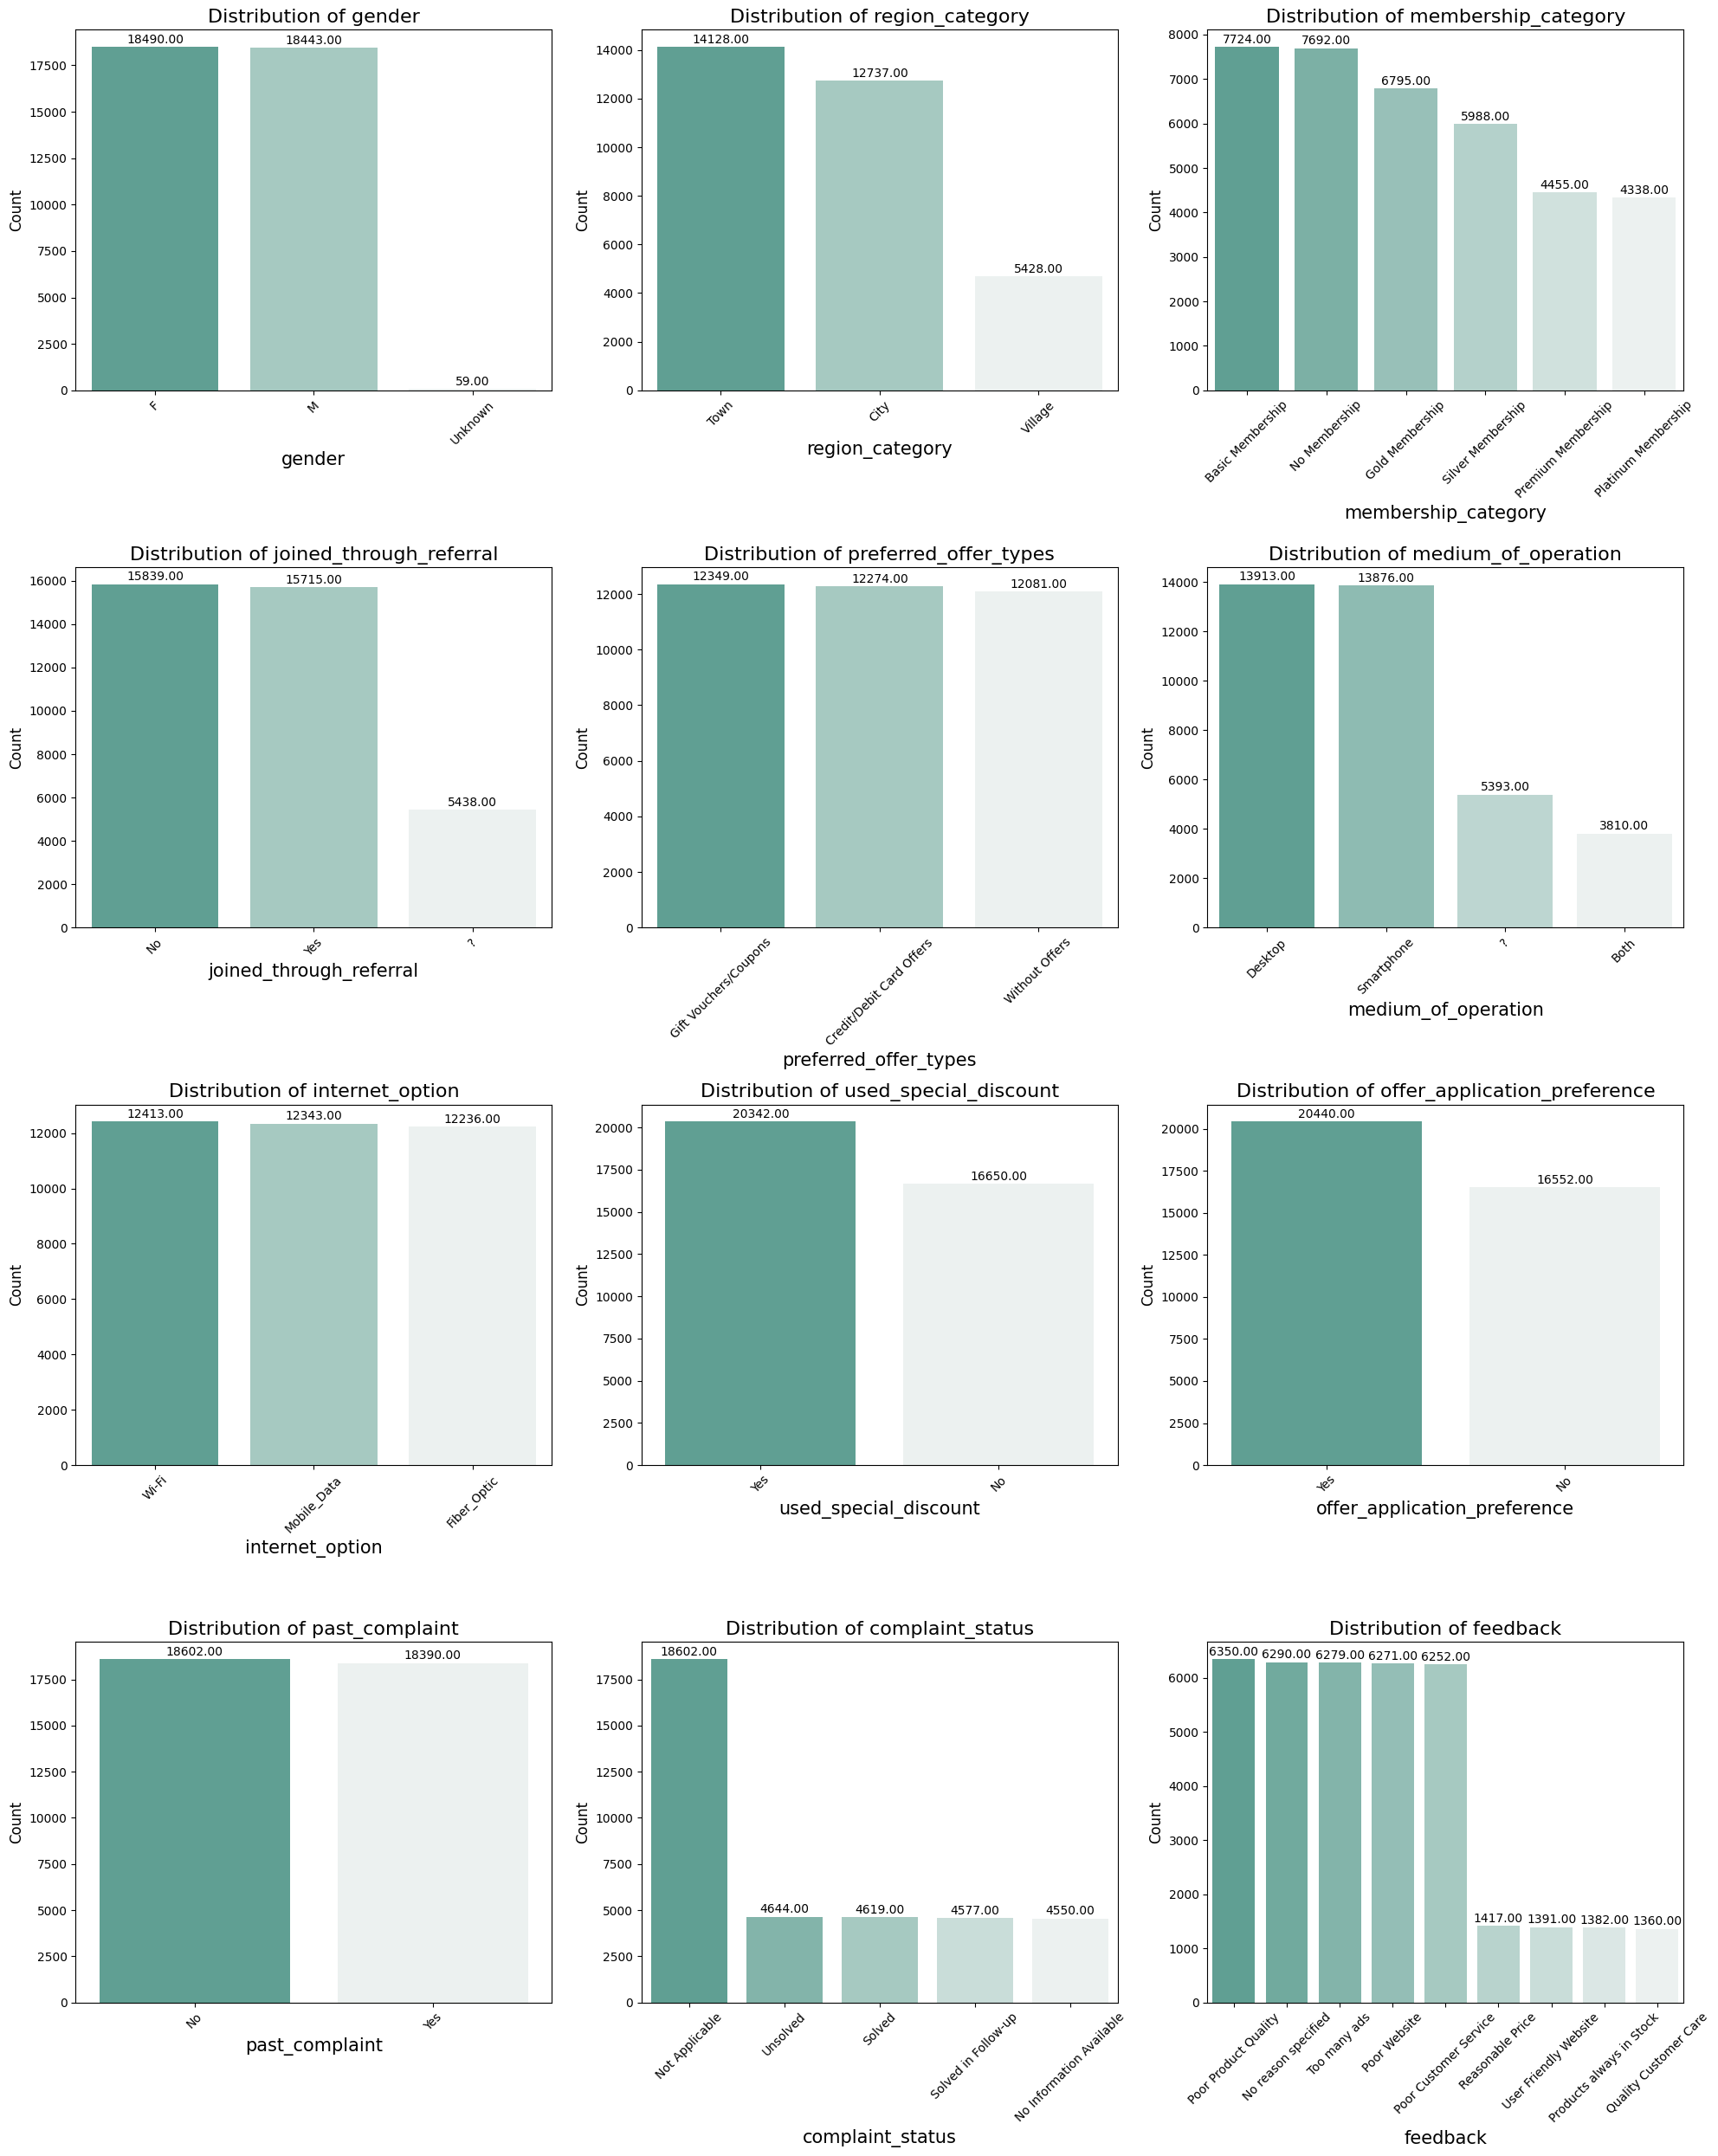

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical columns to plot (excluding problematic ones)
categorical_columns = ["gender", "region_category", "membership_category", "joined_through_referral", 
                       "preferred_offer_types", "medium_of_operation", "internet_option", 
                       "used_special_discount", "offer_application_preference", 
                       "past_complaint", "complaint_status", "feedback"]

# Set up subplots: define number of rows and columns for the grid
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(20, 25)) 
ax = ax.flatten()  # Flatten for easier iteration

# Loop through each categorical column and plot the results using PySpark and Matplotlib
for idx, col in enumerate(categorical_columns):
    # Group by the column and count the occurrences of each category
    distribution = df.groupBy(col).count().orderBy("count", ascending=False)
    
    # Collect results to plot without using Pandas
    categories = distribution.select(col).rdd.flatMap(lambda x: x).collect()
    counts = distribution.select("count").rdd.flatMap(lambda x: x).collect()
    
    # Create bar plot using Matplotlib and Seaborn
    sns.barplot(x=categories, y=counts, ax=ax[idx], palette="light:#5A9_r")
    
    # Set x-axis labels and rotate them for readability
    ax[idx].set_xlabel(col, fontsize=15)
    ax[idx].set_ylabel('Count', fontsize=12)
    ax[idx].set_title(f'Distribution of {col}', fontsize=16)
    ax[idx].tick_params(axis='x', rotation=45)

    # Annotate each bar with its count value
    for p, count in zip(ax[idx].patches, counts):
        ax[idx].annotate(format(count, '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha='center', va='center', xytext=(0, 6), textcoords='offset points')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

### 3.4.1 Distribution of Categorical Variables - Results Summary

•	Gender: The data is nearly balanced with 18,490 females, 18,443 males, and 59 unknown entries.

•	Region Category: There are 5,428 missing values. Most customers are from Towns (14,128), followed by Cities (12,737), and Villages (4,699).

•	Membership Category: The majority of customers have No Membership (7,692) or Basic Membership (7,724), with notable representation in higher tiers like Gold (6,795) and Silver (5,988).

•	Referral Program: 15,715 customers joined via referral, while 15,839 did not and we don't have data for 5,438 customers.

•	Preferred Offer Types: “Gift Vouchers/Coupons” (12,349) is the most common, followed by “Without Offers” (12,081) and “Credit/Debit Card Offers” (12,349). There are 288 missing values.

•	Medium of Operation: Most customers access the platform via Desktop (13,913) or Smartphone (13,876). There are 5,393 missing values.

•	Internet Option: Wi-Fi is the most popular option (12,413 users).

•	Special Discount Usage: 20,342 customers used special discounts, while 16,650 did not.

•	Offer Application Preference: 20,440 customers prefer using offers, while 16,552 do not.

•	Past Complaints: 18,390 customers have filed complaints, while 18,602 have not.

•	Complaint Status: The most common statuses are Not Applicable (18,602), followed by Unsolved (4,644) and Solved in Follow-up (4,619).


## 3.5 Distribution of Numerical Variables

Here, we will visualize the distributions of key numerical variables like `avg_time_spent`, `points_in_wallet`, and `days_since_last_login`.

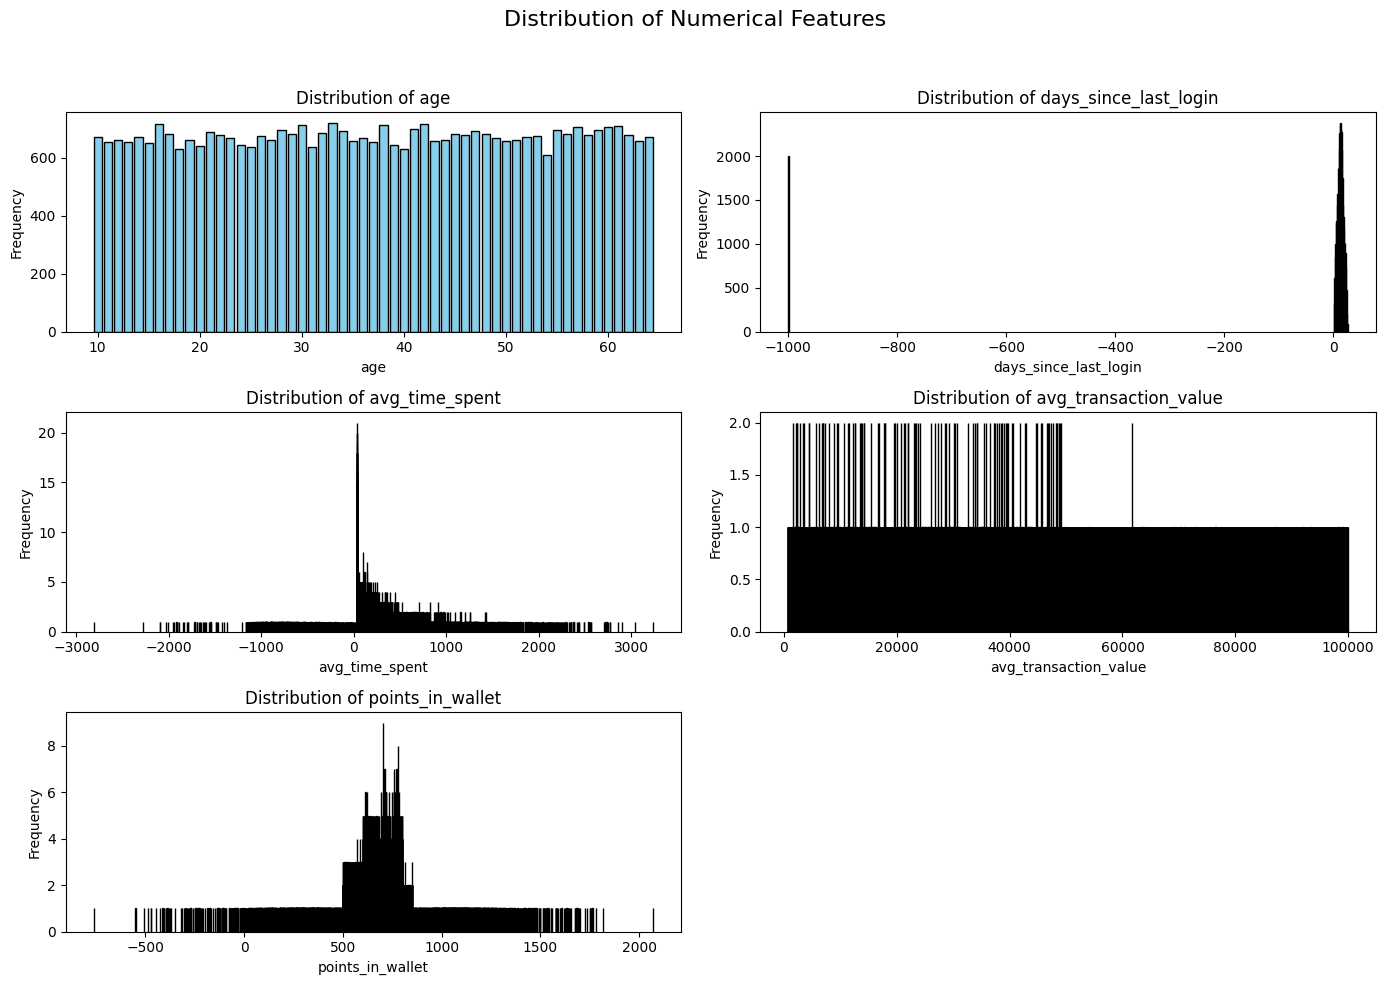

In [8]:
import matplotlib.pyplot as plt
from pyspark.sql import functions as F

# List of numerical features to plot
numerical_columns = ["age", "days_since_last_login", "avg_time_spent", "avg_transaction_value", "points_in_wallet"]

# Dictionary to store results for each column
distribution_data = {}

# Loop through each numerical column, compute distribution using PySpark
for col in numerical_columns:
    # Filter out null or invalid values before grouping
    distribution = df.filter(df[col].isNotNull()) \
                     .groupBy(col).count().orderBy(col)
    
    # Collect the results to lists for plotting
    values = distribution.select(col).rdd.flatMap(lambda x: x).collect()
    counts = distribution.select("count").rdd.flatMap(lambda x: x).collect()
    
    # Store results in the dictionary
    distribution_data[col] = (values, counts)

# Set up subplots: one plot per numerical feature
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 10))
fig.suptitle('Distribution of Numerical Features', fontsize=16)

# Flatten axes array to easily iterate through subplots
axes = axes.flatten()

# Plot the distribution of each numerical feature
for idx, col in enumerate(numerical_columns):
    values, counts = distribution_data[col]
    axes[idx].bar(values, counts, color='skyblue', edgecolor='black')
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')

# Remove empty subplot (since we have 5 plots)
fig.delaxes(axes[5])

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to not overlap with title
plt.show()

In [9]:
# List of numerical columns to check skewness
numerical_columns = ["age", "days_since_last_login", "avg_time_spent", "avg_transaction_value", "points_in_wallet"]

# Loop through each column and calculate skewness
for col in numerical_columns:
    skewness_value = df.select(F.skewness(col)).collect()[0][0]
    print(f"Skewness for {col}: {skewness_value}")

Skewness for age: -0.007319022470650794
Skewness for days_since_last_login: -3.941196000706634
Skewness for avg_time_spent: 0.539602137465249
Skewness for avg_transaction_value: 1.0109861658321913
Skewness for points_in_wallet: -0.08030559224848255


### 3.5.1 Distribution of Numerical Variables - Results Summary

1.	Age:

•	Skewness: -0.007 (nearly symmetrical).

•	Distribution is uniform across age groups.

2.	Days Since Last Login:

•	Skewness: -3.94 (highly negative skew).

•	Most users logged in recently, with a few extreme negative values (likely errors).

3.	Average Time Spent:

•	Skewness: 0.54 (moderate positive skew).

•	Most users spend less time on the platform, with some outliers showing high values and a few negative entries.

4.	Average Transaction Value:

•	Skewness: 1.01 (positively skewed).

•	Majority of transactions are low, with some very high-value outliers.

5.	Points in Wallet:

•	Skewness: -0.08 (slightly negative skew).

•	Distribution is relatively centered, with few users having high or negative point balances.

The skewness and distributions highlight potential data quality issues (e.g., negative values) in several columns that need cleaning before further analysis.

## 3.6 Correlation Analysis

We will now check the correlation between numerical variables and the target variable `churn_risk_score`.

[[ 1.00000000e+00 -3.96972836e-03  1.53053605e-03 -4.73462595e-04
  -1.19726221e-03  6.12449925e-03]
 [-3.96972836e-03  1.00000000e+00 -2.36922441e-03  3.93404109e-03
   4.35732147e-05 -6.22848799e-03]
 [ 1.53053605e-03 -2.36922441e-03  1.00000000e+00  2.08877839e-02
  -1.90520313e-03 -1.42625108e-02]
 [-4.73462595e-04  3.93404109e-03  2.08877839e-02  1.00000000e+00
   5.59569197e-02 -2.18012205e-01]
 [-1.19726221e-03  4.35732147e-05 -1.90520313e-03  5.59569197e-02
   1.00000000e+00 -1.99955801e-01]
 [ 6.12449925e-03 -6.22848799e-03 -1.42625108e-02 -2.18012205e-01
  -1.99955801e-01  1.00000000e+00]]


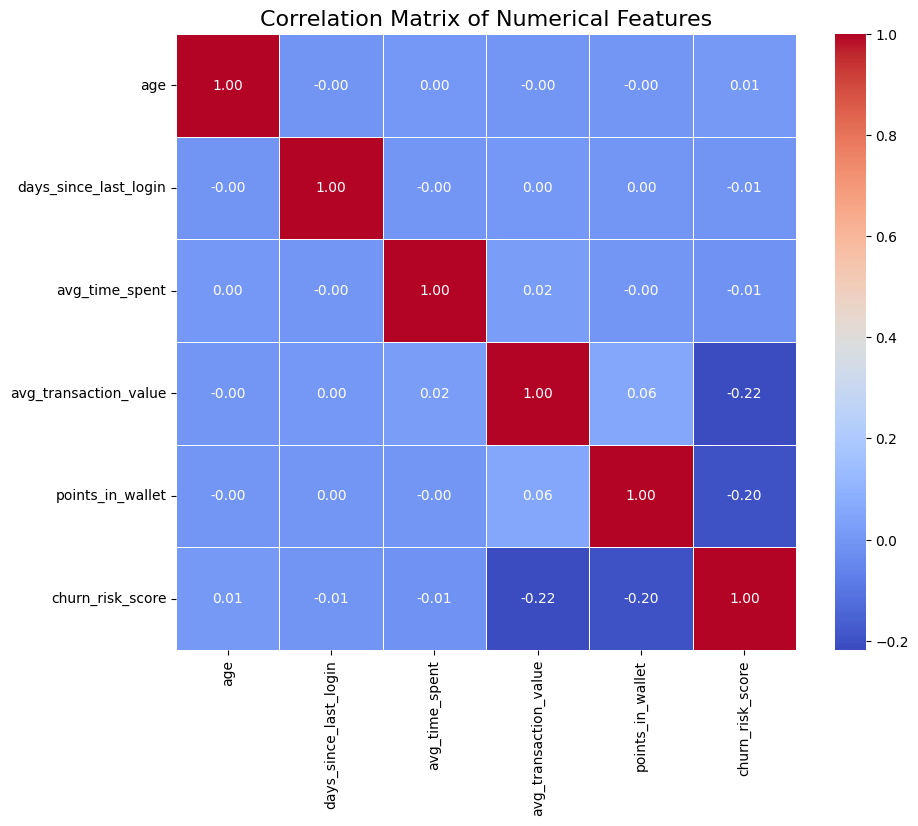

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# List of numerical columns to include in the correlation analysis
numerical_columns = ["age", "days_since_last_login", "avg_time_spent", 
                     "avg_transaction_value", "points_in_wallet", "churn_risk_score"]

# Create an empty matrix to store correlations
correlation_matrix = np.zeros((len(numerical_columns), len(numerical_columns)))

# Calculate correlations between each pair of columns using PySpark
for i, col1 in enumerate(numerical_columns):
    for j, col2 in enumerate(numerical_columns):
        correlation_matrix[i, j] = df.corr(col1, col2)
print(correlation_matrix)
# Plot the correlation matrix as a heatmap using Matplotlib and Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, xticklabels=numerical_columns, 
            yticklabels=numerical_columns, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.show()

	•	avg_transaction_value has a moderately negative correlation with churn_risk_score (-0.22). This suggests that higher transaction values might be associated with lower churn risk. Customers who spend more may be less likely to leave.
	
	•	points_in_wallet also shows a negative correlation with churn_risk_score (-0.20). This could imply that customers with more points in their wallet are less likely to churn, as they have more incentive to stay and redeem their points.

## 3.7 Conclusion of Exploratory Data Analysis

The exploratory analysis revealed key data quality issues, including negative values in days_since_last_login, avg_time_spent, and points_in_wallet, as well as missing values in several categorical features, such as region_category and preferred_offer_types. These issues will need to be addressed during data cleaning.

Notably, avg_transaction_value and points_in_wallet show a negative correlation with churn_risk_score, indicating that higher spending and more points may reduce churn risk. These features will be important in the upcoming modeling phase.

# 4. Preprocessing and Feature Engineering

## 4.1 Data Cleaning

### 4.1.1 Handling Missing Values

In [11]:
# Import necessary functions
from pyspark.sql.functions import col, when, count

# ----------------------------
# 1. Handling 'region_category' (null)
# Decision: Impute with 'Unknown'
# Justification: Missing values represent a lack of information,
# and we want to avoid introducing bias by imputing with an existing category.
df = df.fillna({'region_category': 'Unknown'})

# ----------------------------
# 2. Handling 'joined_through_referral' (values "?")
# Decision: Replace "?" with 'Unknown'
# Justification: Retain the information that this data is unknown,
# rather than removing or imputing with 'Yes' or 'No', which could skew the results.
df = df.withColumn('joined_through_referral', 
                   when(col('joined_through_referral') == '?', 'Unknown').otherwise(col('joined_through_referral')))

# ----------------------------
# 3. Handling 'preferred_offer_types' (null)
# Decision: Impute with the most frequent category
# Justification: The number of missing values is very low (<1%), so
# imputing with the most frequent value minimizes the impact on the data.
most_common_offer = df.groupBy('preferred_offer_types').count().orderBy('count', ascending=False).first()['preferred_offer_types']
df = df.fillna({'preferred_offer_types': most_common_offer})

# ----------------------------
# 4. Handling 'medium_of_operation' (values "?")
# Decision: Replace "?" with 'Unknown'
# Justification: We want to keep the data while flagging that 
# the access medium is unknown.
df = df.withColumn('medium_of_operation', 
                   when(col('medium_of_operation') == '?', 'Unknown').otherwise(col('medium_of_operation')))

# ----------------------------
# 5. Handling 'points_in_wallet' (values "Error")
# Decision: Replace "Error" with null, then impute with the median
# Justification: 'Error' is an anomaly, and using the median is a robust imputation method that avoids being influenced by extreme values.
df = df.withColumn('points_in_wallet', when(col('points_in_wallet') == 'Error', None).otherwise(col('points_in_wallet')))
df = df.withColumn('points_in_wallet', col('points_in_wallet').cast('double'))  # Convert to double to allow imputation
median_points = df.approxQuantile('points_in_wallet', [0.5], 0.0)[0]
df = df.fillna({'points_in_wallet': median_points})

# ----------------------------
# 6. Handling 'avg_frequency_login_days' (null and "Error")
# Decision: Replace "Error" with null, then impute with the median
# Justification: 'Error' is an invalid value. Imputing with the median is a robust choice for this frequency variable.
df = df.withColumn('avg_frequency_login_days', when(col('avg_frequency_login_days') == 'Error', None).otherwise(col('avg_frequency_login_days')))
df = df.withColumn('avg_frequency_login_days', col('avg_frequency_login_days').cast('double'))  # Convert to double
median_freq_login = df.approxQuantile('avg_frequency_login_days', [0.5], 0.0)[0]
df = df.fillna({'avg_frequency_login_days': median_freq_login})

# Verify that missing values have been handled
df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+---+------+-----------+---------------+-------------------+------------+-----------------------+-----------+---------------------+-------------------+---------------+---------------+---------------------+--------------+---------------------+------------------------+----------------+---------------------+----------------------------+--------------+----------------+--------+----------------+
|age|gender|security_no|region_category|membership_category|joining_date|joined_through_referral|referral_id|preferred_offer_types|medium_of_operation|internet_option|last_visit_time|days_since_last_login|avg_time_spent|avg_transaction_value|avg_frequency_login_days|points_in_wallet|used_special_discount|offer_application_preference|past_complaint|complaint_status|feedback|churn_risk_score|
+---+------+-----------+---------------+-------------------+------------+-----------------------+-----------+---------------------+-------------------+---------------+---------------+---------------------+-------

### 4.1.2 Handling Date Columns

In this section, we will transform the date columns to extract useful information for our model. Here’s what we will do:

•	For joining_date:
- Calculate the client’s seniority in days, which is the number of days that have passed since they joined the service up to the current date.

•	For last_visit_time:
- Extract the year of the client’s last visit.
- Afterwards, we will drop the original date columns since we will have extracted the necessary information.

In [12]:
from pyspark.sql.functions import to_date, to_timestamp, datediff, current_date, year

# Convert 'joining_date' to date type
df = df.withColumn('joining_date', to_date(col('joining_date'), 'dd-MM-yyyy'))

# Convert 'last_visit_time' to timestamp type
df = df.withColumn('last_visit_time', to_timestamp(col('last_visit_time')))

# Calculate customer seniority in days
df = df.withColumn('customer_seniority', datediff(current_date(), col('joining_date')))

# Extract the year from 'last_visit_time'
df = df.withColumn('last_visit_year', year(col('last_visit_time')))

# Drop the original date columns
df = df.drop('joining_date', 'last_visit_time', 'security_no', 'referral_id')

### 4.1.3 Correction of Outliers

Some numeric columns contain negative values ​​that don't make sense in context, like days_since_last_login and avg_time_spent. We will correct these errors by replacing negative values with the median of the respective columns.

In [13]:
# 'days_since_last_login'
df = df.withColumn('days_since_last_login', when(col('days_since_last_login') < 0, None).otherwise(col('days_since_last_login')))
median_days_since_last_login = df.approxQuantile('days_since_last_login', [0.5], 0.0)[0]
df = df.fillna({'days_since_last_login': median_days_since_last_login})

# 'avg_time_spent'
df = df.withColumn('avg_time_spent', when(col('avg_time_spent') < 0, None).otherwise(col('avg_time_spent')))
median_avg_time_spent = df.approxQuantile('avg_time_spent', [0.5], 0.0)[0]
df = df.fillna({'avg_time_spent': median_avg_time_spent})

In [14]:
from pyspark.sql.functions import col, expr

# Step 1: Calculate Q1 (25th percentile) and Q3 (75th percentile) for numeric columns
# These will be used to calculate the IQR and detect outliers.
numeric_cols = ['days_since_last_login', 'avg_time_spent', 'points_in_wallet', 'avg_frequency_login_days', 'customer_seniority', 'last_visit_year']  # Add other numeric columns as needed

# Create a dictionary to store the percentiles
percentiles = {}
for col_name in numeric_cols:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    q1 = df.approxQuantile(col_name, [0.25], 0.0)[0]
    q3 = df.approxQuantile(col_name, [0.75], 0.0)[0]
    iqr = q3 - q1
    
    # Store the percentiles and IQR for each column
    percentiles[col_name] = {'Q1': q1, 'Q3': q3, 'IQR': iqr}

# Step 2: Detect outliers for each numeric column using IQR
# An outlier is defined as a value less than Q1 - 1.5*IQR or greater than Q3 + 1.5*IQR
for col_name in numeric_cols:
    q1 = percentiles[col_name]['Q1']
    q3 = percentiles[col_name]['Q3']
    iqr = percentiles[col_name]['IQR']
    
    # Define lower and upper bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Identify outliers (values outside the bounds)
    outliers = df.filter((col(col_name) < lower_bound) | (col(col_name) > upper_bound))
    
    # Count the number of outliers
    outlier_count = outliers.count()
    
    print(f'Total number of outliers in column {col_name}: {outlier_count}')


Total number of outliers in column days_since_last_login: 0
Total number of outliers in column avg_time_spent: 3227
Total number of outliers in column points_in_wallet: 4786
Total number of outliers in column avg_frequency_login_days: 846
Total number of outliers in column customer_seniority: 0
Total number of outliers in column last_visit_year: 0


In [15]:
from pyspark.sql.functions import col, when

# List of numeric columns to process
numeric_cols = ['avg_time_spent', 'points_in_wallet', 'avg_frequency_login_days']

# Step 1: Calculate the IQR, lower and upper bounds for each column
percentiles = {}
for col_name in numeric_cols:
    q1 = df.approxQuantile(col_name, [0.25], 0.0)[0]
    q3 = df.approxQuantile(col_name, [0.75], 0.0)[0]
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    percentiles[col_name] = {
        'Q1': q1,
        'Q3': q3,
        'IQR': iqr,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound
    }

# Step 2: Handle outliers based 
for col_name in numeric_cols:
    bounds = percentiles[col_name]
    lower_bound = bounds['lower_bound']
    upper_bound = bounds['upper_bound']
    
    if col_name in ['avg_time_spent', 'points_in_wallet']:
        # Capping the outliers
        df = df.withColumn(col_name, when(col(col_name) < lower_bound, lower_bound).otherwise(col(col_name)))
        df = df.withColumn(col_name, when(col(col_name) > upper_bound, upper_bound).otherwise(col(col_name)))
    elif col_name == 'avg_frequency_login_days':
        # Imputing outliers with the median 
        median_value = df.approxQuantile(col_name, [0.5], 0.0)[0]
        df = df.withColumn(col_name, when((col(col_name) < lower_bound) | (col(col_name) > upper_bound), median_value).otherwise(col(col_name)))

In [16]:
# Recalculate the number of outliers after processing
for col_name in numeric_cols:
    bounds = percentiles[col_name]
    lower_bound = bounds['lower_bound']
    upper_bound = bounds['upper_bound']
    
    outliers = df.filter((col(col_name) < lower_bound) | (col(col_name) > upper_bound))
    outlier_count = outliers.count()
    
    print(f'Number of outliers remaining in column {col_name}: {outlier_count}')

Number of outliers remaining in column avg_time_spent: 0
Number of outliers remaining in column points_in_wallet: 0
Number of outliers remaining in column avg_frequency_login_days: 0


## 4.2 Categorical Data Encoding
We will encode categorical variables using StringIndexer and OneHotEncoder.

In [17]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder
from pyspark.ml import Pipeline

# List of categorical variables to encode
categorical_cols = ['gender', 'region_category', 'membership_category', 'joined_through_referral', 
                    'preferred_offer_types', 'medium_of_operation', 'internet_option', 
                    'used_special_discount', 'offer_application_preference', 'past_complaint', 
                    'complaint_status', 'feedback']

# Create the StringIndexers
indexers = [StringIndexer(inputCol=column, outputCol=column + '_index', handleInvalid='keep') for column in categorical_cols]

# Create the OneHotEncoders
encoder = OneHotEncoder(inputCols=[indexer.getOutputCol() for indexer in indexers],
                        outputCols=[column + "_ohe" for column in categorical_cols],
                        handleInvalid='keep')

# Create a pipeline to apply the transformations
pipeline = Pipeline(stages=indexers + [encoder])

# Apply the pipeline to transform the DataFrame
df_transformed = pipeline.fit(df).transform(df)

# Drop the original categorical columns and the index columns
index_cols = [column + '_index' for column in categorical_cols]  # Create a list of index columns to drop
df_transformed = df_transformed.drop(*categorical_cols, *index_cols)

# Display the transformed DataFrame
df_transformed.show()

+---+---------------------+--------------+---------------------+------------------------+------------------+----------------+------------------+---------------+-------------+-------------------+-----------------------+---------------------------+-------------------------+-----------------------+-------------------+-------------------------+--------------------------------+------------------+--------------------+--------------+
|age|days_since_last_login|avg_time_spent|avg_transaction_value|avg_frequency_login_days|  points_in_wallet|churn_risk_score|customer_seniority|last_visit_year|   gender_ohe|region_category_ohe|membership_category_ohe|joined_through_referral_ohe|preferred_offer_types_ohe|medium_of_operation_ohe|internet_option_ohe|used_special_discount_ohe|offer_application_preference_ohe|past_complaint_ohe|complaint_status_ohe|  feedback_ohe|
+---+---------------------+--------------+---------------------+------------------------+------------------+----------------+-------------

## 4.3 Feature Scaling

In [18]:
from pyspark.ml.feature import StandardScaler, VectorAssembler
from pyspark.ml import Pipeline

# Updated list of numerical columns that may need scaling
numerical_cols = ['age', 'points_in_wallet', 'avg_time_spent', 'avg_transaction_value', 
                  'days_since_last_login', 'avg_frequency_login_days', 'customer_seniority']

# Assemble the numerical features into a single vector column
assembler = VectorAssembler(inputCols=numerical_cols, outputCol='numerical_features')

# Apply standard scaling to the numerical features
scaler = StandardScaler(inputCol='numerical_features', outputCol='scaled_features')

# Create a pipeline for scaling
pipeline_scaling = Pipeline(stages=[assembler, scaler])

# Apply the pipeline to transform the DataFrame
df_transformed = pipeline_scaling.fit(df_transformed).transform(df_transformed)

# You may drop the original numerical columns after scaling if you don't need them
df_transformed = df_transformed.drop(*numerical_cols)

# Display the transformed DataFrame
df_transformed.show()

+----------------+---------------+-------------+-------------------+-----------------------+---------------------------+-------------------------+-----------------------+-------------------+-------------------------+--------------------------------+------------------+--------------------+--------------+--------------------+--------------------+
|churn_risk_score|last_visit_year|   gender_ohe|region_category_ohe|membership_category_ohe|joined_through_referral_ohe|preferred_offer_types_ohe|medium_of_operation_ohe|internet_option_ohe|used_special_discount_ohe|offer_application_preference_ohe|past_complaint_ohe|complaint_status_ohe|  feedback_ohe|  numerical_features|     scaled_features|
+----------------+---------------+-------------+-------------------+-----------------------+---------------------------+-------------------------+-----------------------+-------------------+-------------------------+--------------------------------+------------------+--------------------+--------------+--

In [19]:
# Since the last_visit_year column doesn’t provide much variance (it appears to be constant for all rows), it may not add significant value to the model and can potentially be dropped.
df_transformed = df_transformed.drop('last_visit_year')

In [20]:
df_transformed = df_transformed.drop('numeral_features')

# 5. Training and Evaluating Models

In this step, we will train and evaluate seven different classification models to predict churn risk. We will also perform hyperparameter tuning (fine-tuning) for each model using cross-validation.

Models to Train

	1.	Logistic Regression
	2.	Decision Tree
	3.	Random Forest
	4.	Gradient-Boosted Trees
	5.	XGBoost



## 5.1 Data Preparation
Before starting, we need to ensure that our data is properly prepared for model training.

In [21]:
#import necessary libraries

from pyspark.sql import SparkSession
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.classification import (
    LogisticRegression, DecisionTreeClassifier,
    RandomForestClassifier, GBTClassifier, NaiveBayes
)
from pyspark.ml.functions import vector_to_array

In [22]:
# Identify one-hot encoded columns
ohe_cols = [col_name for col_name in df_transformed.columns if '_ohe' in col_name]

# Assemble one-hot encoded columns into a single vector
assembler_ohe = VectorAssembler(inputCols=ohe_cols, outputCol='ohe_features')
df_transformed = assembler_ohe.transform(df_transformed)

# Combine 'scaled_features' and 'ohe_features' into a single 'features' column
assembler_all = VectorAssembler(inputCols=['scaled_features', 'ohe_features'], outputCol='features')
df_transformed = assembler_all.transform(df_transformed)

# Index the target variable if necessary
label_indexer = StringIndexer(inputCol='churn_risk_score', outputCol='label')
df_transformed = label_indexer.fit(df_transformed).transform(df_transformed)

# Select only the necessary columns
df_model = df_transformed.select('features', 'label')

In [23]:
# Split the data into training and testing sets
train_data, test_data = df_model.randomSplit([0.8, 0.2], seed=42)

## 5.2 Model Training and Evaluation
We will train each model, perform hyperparameter tuning with cross-validation, and then evaluate performance on the test set.


### 5.2.1 Logistic Regression

In [24]:
# Define the model
lr = LogisticRegression(featuresCol='features', labelCol='label')

In [25]:
# Define the parameter grid
paramGrid_lr = ParamGridBuilder() \
    .addGrid(lr.regParam, [0.01, 0.1, 0.5]) \
    .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0]) \
    .build()

In [26]:
# Define the cross-validator
crossval_lr = CrossValidator(estimator=lr,
                             estimatorParamMaps=paramGrid_lr,
                             evaluator=BinaryClassificationEvaluator(),
                             numFolds=3)

In [27]:
# Train the model
cvModel_lr = crossval_lr.fit(train_data)

In [28]:
# Evaluate the model 
predictions_lr = cvModel_lr.transform(test_data)

# Initialiser les évaluateurs
binary_evaluator = BinaryClassificationEvaluator()
multi_evaluator = MulticlassClassificationEvaluator()

# Calculer l'AUC
auc_lr = binary_evaluator.evaluate(predictions_lr, {binary_evaluator.metricName: 'areaUnderROC'})

# Calculer l'Accuracy
accuracy_lr = multi_evaluator.evaluate(predictions_lr, {multi_evaluator.metricName: 'accuracy'})

# Calculer la Précision
precision_lr = multi_evaluator.evaluate(predictions_lr, {multi_evaluator.metricName: 'weightedPrecision'})

# Calculer le Rappel
recall_lr = multi_evaluator.evaluate(predictions_lr, {multi_evaluator.metricName: 'weightedRecall'})

# Calculer le F1-score
f1_lr = multi_evaluator.evaluate(predictions_lr, {multi_evaluator.metricName: 'f1'})

print(f"Logistic Regression Metrics:")
print(f"AUC: {auc_lr}")
print(f"Accuracy: {accuracy_lr}")
print(f"Precision: {precision_lr}")
print(f"Recall: {recall_lr}")
print(f"F1 Score: {f1_lr}")

Logistic Regression Metrics:
AUC: 0.9649325357664953
Accuracy: 0.8966034647387805
Precision: 0.900938064156175
Recall: 0.8966034647387806
F1 Score: 0.8967734149085484


In [29]:
# Save the CrossValidatorModel
cvModel_lr.save("models/logistic_regression_cvModel")

# Alternatively, save only the best model
best_model_lr = cvModel_lr.bestModel
best_model_lr.save("models/logistic_regression_bestModel")

### 5.2.2 Decision Tree

In [30]:
# Define the model
dt = DecisionTreeClassifier(featuresCol='features', labelCol='label')

In [31]:
# Define the parameter grid
paramGrid_dt = ParamGridBuilder() \
    .addGrid(dt.maxDepth, [5, 10, 15]) \
    .addGrid(dt.maxBins, [20, 30, 40]) \
    .build()

In [32]:
# Define the cross-validator
crossval_dt = CrossValidator(estimator=dt,
                             estimatorParamMaps=paramGrid_dt,
                             evaluator=BinaryClassificationEvaluator(),
                             numFolds=3)

In [33]:
cvModel_dt = crossval_dt.fit(train_data)

In [34]:
# Evaluate the model
predictions_dt = cvModel_dt.transform(test_data)

auc_dt = binary_evaluator.evaluate(predictions_dt, {binary_evaluator.metricName: 'areaUnderROC'})
accuracy_dt = multi_evaluator.evaluate(predictions_dt, {multi_evaluator.metricName: 'accuracy'})
precision_dt = multi_evaluator.evaluate(predictions_dt, {multi_evaluator.metricName: 'weightedPrecision'})
recall_dt = multi_evaluator.evaluate(predictions_dt, {multi_evaluator.metricName: 'weightedRecall'})
f1_dt = multi_evaluator.evaluate(predictions_dt, {multi_evaluator.metricName: 'f1'})

print(f"Decision Tree Metrics:")
print(f"AUC: {auc_dt}")
print(f"Accuracy: {accuracy_dt}")
print(f"Precision: {precision_dt}")
print(f"Recall: {recall_dt}")
print(f"F1 Score: {f1_dt}")

Decision Tree Metrics:
AUC: 0.9563091253365343
Accuracy: 0.9117446460237348
Precision: 0.9117197599207986
Recall: 0.9117446460237348
F1 Score: 0.9117272700435175


In [35]:
cvModel_dt.save("models/decision_tree_cvModel")

# Save only the best model
best_model_dt = cvModel_dt.bestModel
best_model_dt.save("models/decision_tree_bestModel")

### 5.2.3 Random Forest

In [36]:
# Define the model
rf = RandomForestClassifier(featuresCol='features', labelCol='label')

In [37]:
# Define the parameter grid
paramGrid_rf = ParamGridBuilder() \
    .addGrid(rf.numTrees, [50, 100]) \
    .addGrid(rf.maxDepth, [5, 10]) \
    .build()

In [38]:
# Define the cross-validator
crossval_rf = CrossValidator(estimator=rf,
                             estimatorParamMaps=paramGrid_rf,
                             evaluator=BinaryClassificationEvaluator(),
                             numFolds=3)

In [39]:
# Train the model
cvModel_rf = crossval_rf.fit(train_data)

In [40]:
# Evaluate the model
predictions_rf = cvModel_rf.transform(test_data)
auc_rf = binary_evaluator.evaluate(predictions_rf, {binary_evaluator.metricName: 'areaUnderROC'})
accuracy_rf = multi_evaluator.evaluate(predictions_rf, {multi_evaluator.metricName: 'accuracy'})
precision_rf = multi_evaluator.evaluate(predictions_rf, {multi_evaluator.metricName: 'weightedPrecision'})
recall_rf = multi_evaluator.evaluate(predictions_rf, {multi_evaluator.metricName: 'weightedRecall'})
f1_rf = multi_evaluator.evaluate(predictions_rf, {multi_evaluator.metricName: 'f1'})

print(f"Random Forest Metrics:")
print(f"AUC: {auc_rf}")
print(f"Accuracy: {accuracy_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1 Score: {f1_rf}")

Random Forest Metrics:
AUC: 0.9724437061231432
Accuracy: 0.9262037921156732
Precision: 0.9261875780805005
Recall: 0.9262037921156732
F1 Score: 0.9261927544681998


In [41]:
cvModel_rf.save("models/random_forest_cvModel")

best_model_rf = cvModel_rf.bestModel
best_model_rf.save("models/random_forest_bestModel")

### 5.2.4 Gradient-Boosted Trees

In [42]:
# Define the model
gbt = GBTClassifier(featuresCol='features', labelCol='label')

In [43]:
# Define the parameter grid
paramGrid_gbt = ParamGridBuilder() \
    .addGrid(gbt.maxIter, [10, 20]) \
    .addGrid(gbt.maxDepth, [5, 10]) \
    .build()

In [44]:
# Create the cross-validator
crossval_gbt = CrossValidator(estimator=gbt,
                              estimatorParamMaps=paramGrid_gbt,
                              evaluator=BinaryClassificationEvaluator(),
                              numFolds=3)

In [45]:
# Train the model
cvModel_gbt = crossval_gbt.fit(train_data)

In [46]:
# Evaluate the model
predictions_gbt = cvModel_gbt.transform(test_data)
auc_gbt = binary_evaluator.evaluate(predictions_gbt, {binary_evaluator.metricName: 'areaUnderROC'})
accuracy_gbt = multi_evaluator.evaluate(predictions_gbt, {multi_evaluator.metricName: 'accuracy'})
precision_gbt = multi_evaluator.evaluate(predictions_gbt, {multi_evaluator.metricName: 'weightedPrecision'})
recall_gbt = multi_evaluator.evaluate(predictions_gbt, {multi_evaluator.metricName: 'weightedRecall'})
f1_gbt = multi_evaluator.evaluate(predictions_gbt, {multi_evaluator.metricName: 'f1'})

print(f"Gradient-Boosted Tree Metrics:")
print(f"AUC: {auc_gbt}")
print(f"Accuracy: {accuracy_gbt}")
print(f"Precision: {precision_gbt}")
print(f"Recall: {recall_gbt}")
print(f"F1 Score: {f1_gbt}")


Gradient-Boosted Tree Metrics:
AUC: 0.9734085941498274
Accuracy: 0.9309780384667848
Precision: 0.9310111488841881
Recall: 0.930978038466785
F1 Score: 0.9309901363955699


In [47]:
cvModel_gbt.save("models/gradient_boosted_trees_cvModel")

# Save only the best model
best_model_gbt = cvModel_gbt.bestModel
best_model_gbt.save("models/gradient_boosted_trees_bestModel")

### 5.2.5 XGBoost

In [48]:
from xgboost.spark import SparkXGBClassifier

In [49]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Initialize the XGBoost classifier with correct parameter names
xgb = SparkXGBClassifier(features_col='features', label_col='label')

# Define the parameter grid for hyperparameter tuning
paramGrid_xgb = ParamGridBuilder() \
    .addGrid(xgb.max_depth, [5, 10]) \
    .addGrid(xgb.learning_rate, [0.1, 0.3]) \
    .addGrid(xgb.n_estimators, [50, 100]) \
    .build()

# Configure cross-validation
crossval_xgb = CrossValidator(estimator=xgb,
                              estimatorParamMaps=paramGrid_xgb,
                              evaluator=BinaryClassificationEvaluator(),
                              numFolds=3)

# Train the model
cvModel_xgb = crossval_xgb.fit(train_data)

2024-10-01 05:15:03,782 INFO XGBoost-PySpark: _fit Running xgboost-2.1.1 on 1 workers with
	booster params: {'device': 'cpu', 'learning_rate': 0.1, 'max_depth': 5, 'objective': 'binary:logistic', 'nthread': 1}
	train_call_kwargs_params: {'verbose_eval': True, 'num_boost_round': 50}
	dmatrix_kwargs: {'nthread': 1, 'missing': nan}
2024-10-01 05:15:05,961 INFO XGBoost-PySpark: _train_booster Training on CPUs 1]
[05:15:06] Task 0 got rank 0
2024-10-01 05:15:08,211 INFO XGBoost-PySpark: _fit Finished xgboost training!   
2024-10-01 05:15:10,187 INFO XGBoost-PySpark: predict_udf Do the inference on the CPUs
2024-10-01 05:15:10,455 INFO XGBoost-PySpark: _fit Running xgboost-2.1.1 on 1 workers with
	booster params: {'device': 'cpu', 'learning_rate': 0.1, 'max_depth': 5, 'objective': 'binary:logistic', 'nthread': 1}
	train_call_kwargs_params: {'verbose_eval': True, 'num_boost_round': 100}
	dmatrix_kwargs: {'nthread': 1, 'missing': nan}
2024-10-01 05:15:10,568 INFO XGBoost-PySpark: _train_booste

In [50]:
# Make predictions on the test data
predictions_xgb = cvModel_xgb.transform(test_data)

# Evaluate the model
# Initialize the evaluator using the 'probability' column
binary_evaluator = BinaryClassificationEvaluator(
    rawPredictionCol='probability',
    labelCol='label',
    metricName='areaUnderROC'
)
auc_xgb = binary_evaluator.evaluate(predictions_xgb, {binary_evaluator.metricName: 'areaUnderROC'})
accuracy_xgb = multi_evaluator.evaluate(predictions_xgb, {multi_evaluator.metricName: 'accuracy'})
precision_xgb = multi_evaluator.evaluate(predictions_xgb, {multi_evaluator.metricName: 'weightedPrecision'})
recall_xgb = multi_evaluator.evaluate(predictions_xgb, {multi_evaluator.metricName: 'weightedRecall'})
f1_xgb = multi_evaluator.evaluate(predictions_xgb, {multi_evaluator.metricName: 'f1'})

print(f"XGBoost Metrics:")
print(f"AUC: {auc_xgb}")
print(f"Accuracy: {accuracy_xgb}")
print(f"Precision: {precision_xgb}")
print(f"Recall: {recall_xgb}")
print(f"F1 Score: {f1_xgb}")


2024-10-01 05:16:20,494 INFO XGBoost-PySpark: predict_udf Do the inference on the CPUs
2024-10-01 05:16:21,109 INFO XGBoost-PySpark: predict_udf Do the inference on the CPUs
2024-10-01 05:16:21,656 INFO XGBoost-PySpark: predict_udf Do the inference on the CPUs
2024-10-01 05:16:22,156 INFO XGBoost-PySpark: predict_udf Do the inference on the CPUs
2024-10-01 05:16:22,554 INFO XGBoost-PySpark: predict_udf Do the inference on the CPUs


XGBoost Metrics:
AUC: 0.9748312738515076
Accuracy: 0.9297503751193562
Precision: 0.9300198794825945
Recall: 0.9297503751193561
F1 Score: 0.9296372897336721


In [62]:
save_path = "/Users/tomrun/Documents/Stage/CustomerChurnPrediction/models/xgboost_bestModel"
print(f"Attempting to save model at: {save_path}")

# Save the best model
best_model_xgb = cvModel_xgb.bestModel
best_model_xgb.write().overwrite().save(save_path)

Attempting to save model at: /Users/tomrun/Documents/Stage/CustomerChurnPrediction/models/


## 5.3 Model Comparison

In [52]:
import pandas as pd

metrics_data = [
    {'Model': 'Logistic Regression', 'AUC': auc_lr, 'Accuracy': accuracy_lr, 'Precision': precision_lr, 'Recall': recall_lr, 'F1 Score': f1_lr},
    {'Model': 'Decision Tree', 'AUC': auc_dt, 'Accuracy': accuracy_dt, 'Precision': precision_dt, 'Recall': recall_dt, 'F1 Score': f1_dt},
    {'Model': 'Random Forest', 'AUC': auc_rf, 'Accuracy': accuracy_rf, 'Precision': precision_rf, 'Recall': recall_rf, 'F1 Score': f1_rf},
    {'Model': 'Gradient Boosted Tree', 'AUC': auc_gbt, 'Accuracy': accuracy_gbt, 'Precision': precision_gbt, 'Recall': recall_gbt, 'F1 Score': f1_gbt},
    {'Model': 'XGBoost', 'AUC': auc_xgb, 'Accuracy': accuracy_xgb, 'Precision': precision_xgb, 'Recall': recall_xgb, 'F1 Score': f1_xgb}
]

metrics_df = pd.DataFrame(metrics_data)

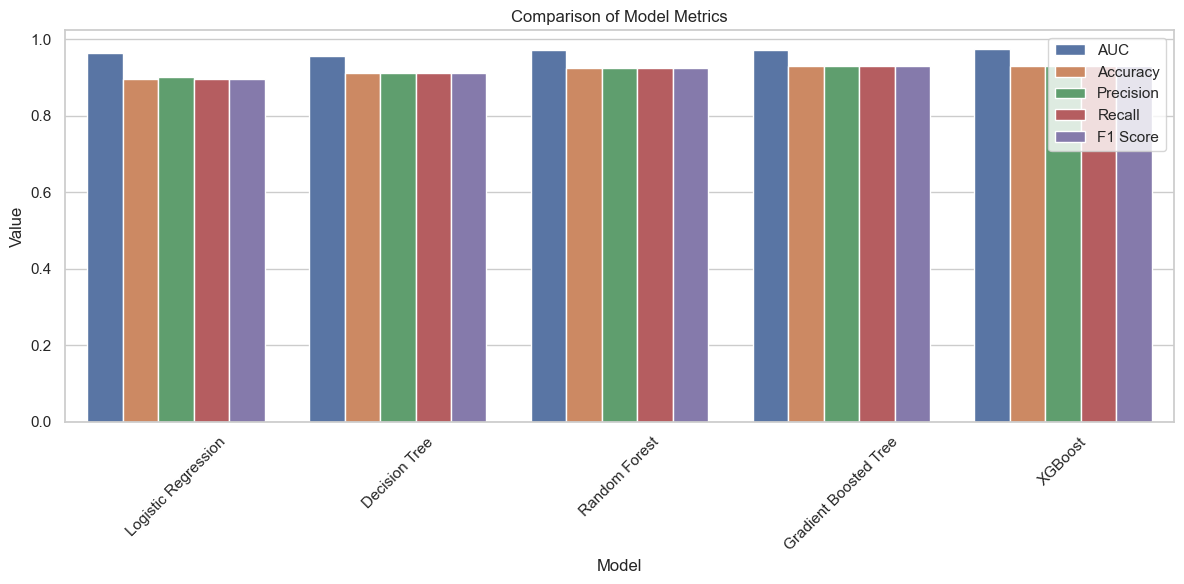

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

metrics_melted = metrics_df.melt(id_vars=['Model'], var_name='Metric', value_name='Value')

plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Value', hue='Metric', data=metrics_melted)
plt.title('Comparison of Model Metrics')
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [54]:
# print the metrics dataframe
print(metrics_df)

                   Model       AUC  Accuracy  Precision    Recall  F1 Score
0    Logistic Regression  0.964933  0.896603   0.900938  0.896603  0.896773
1          Decision Tree  0.956309  0.911745   0.911720  0.911745  0.911727
2          Random Forest  0.972444  0.926204   0.926188  0.926204  0.926193
3  Gradient Boosted Tree  0.973409  0.930978   0.931011  0.930978  0.930990
4                XGBoost  0.974831  0.929750   0.930020  0.929750  0.929637


In [55]:
best_model_recall = metrics_df.sort_values(by='Recall', ascending=False).iloc[0]
print(f"Best model based on Recall is {best_model_recall['Model']} with Recall {best_model_recall['Recall']}")

Best model based on Recall is Gradient Boosted Tree with Recall 0.930978038466785


In the context of churn prediction, the most important metrics are typically:

- **Recall (Sensitivity):** This metric measures the model's ability to correctly identify customers who are going to churn (minimizing false negatives).
- **Precision:** This refers to the model's ability to minimize false positives (predicting churn for customers who will not actually churn).
- **F1 Score:** This is the harmonic mean of precision and recall, balancing the two.

Depending on your priorities, you can select the most relevant metric. For instance, if your main goal is to ensure that no customer at risk of churning is missed, a model with high recall should be favored.

In the current results, **XGBoost** has outperformed all other models across all metrics, making it the clear choice:

Since XGBoost performs better in every key metric (AUC, accuracy, precision, recall, and F1 score), it is the optimal model for churn prediction in this case.

In [57]:
from pyspark.ml.classification import GBTClassificationModel

best_model_gbt_loaded = GBTClassificationModel.load("models/gradient_boosted_trees_bestModel")

In [58]:
import os

# Print the current working directory
print("Current Working Directory:", os.getcwd())

Current Working Directory: /Users/tomrun/Documents/Stage/CustomerChurnPrediction/notebooks
